In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
matplotlib.rcParams['axes.unicode_minus'] = False
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb

In [3]:
model = keras.models.load_model('best-cnn-model.h5')

In [4]:
model.layers

In [6]:
# 가중치와 절편 : 0번은 가중치, 1번은 절편
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [8]:
conv_weights = conv.weights[0].numpy()
# 평균, 표준편차 - 표준편차를 보면서 훈련이 잘 되었는지 확인
print(conv_weights.mean(), conv_weights.std())

-0.02994295 0.243602


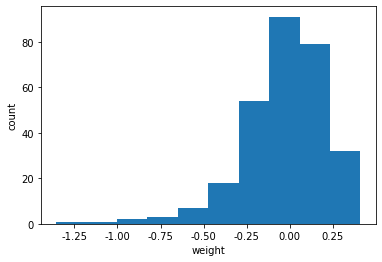

In [9]:
# 가중치 그래프 - 0은 중요하지 않는데이터
# -,+의 값은 훈련을 통해 중요한 데이터
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

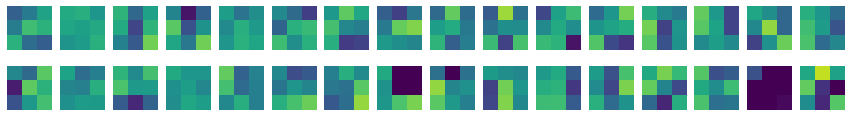

In [10]:
# 그래프 그리기 : 2*16=32개 그래프 그리기
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        # (3,3,1,32) -> 모든데이터의 32개 필터값을 출력
        # 가중치를 동일하게 줌. 음수는 어두운색, 양수는 밝은색:학습이 많이 됨
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [11]:
# 합성곱 신경망 신규선언
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))


In [12]:
# 훈련되지 않은 모델레이어
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0005829152 0.0864964


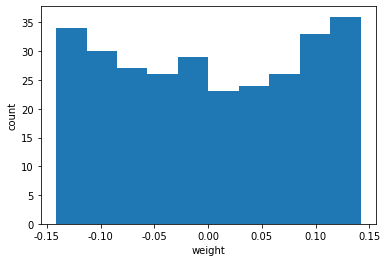

In [14]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

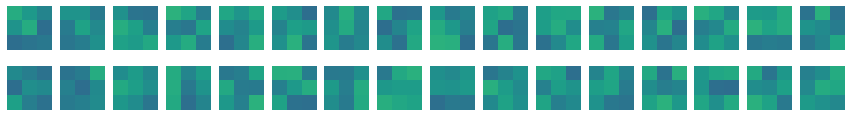

In [15]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [18]:
# 함수형 api - 학습되지 않은 모델의 첫번째 input
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [19]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [22]:
# 특성 맵 시각화
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

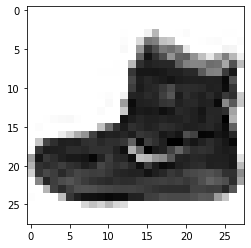

In [23]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [24]:
# 1개의 입력데이터 생성
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

In [25]:
print(feature_maps.shape)

(1, 28, 28, 32)


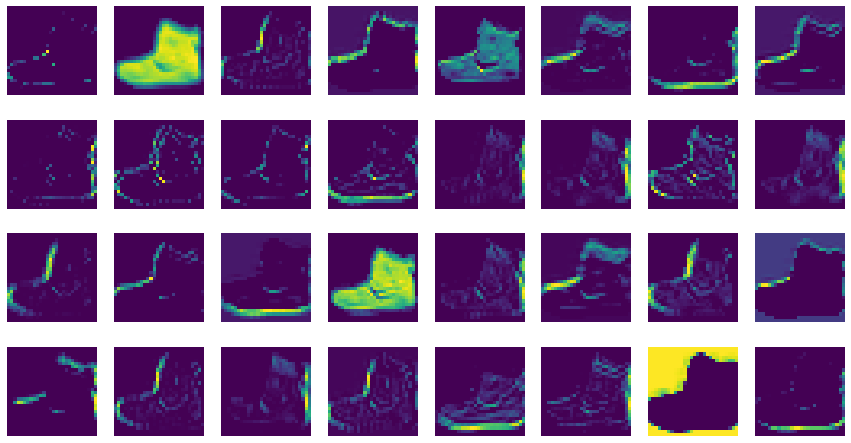

In [26]:
# 12개 이미지 출력
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [27]:
# 2번째 모델
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [28]:
# 입력예측
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

In [29]:
print(feature_maps.shape)

(1, 14, 14, 64)


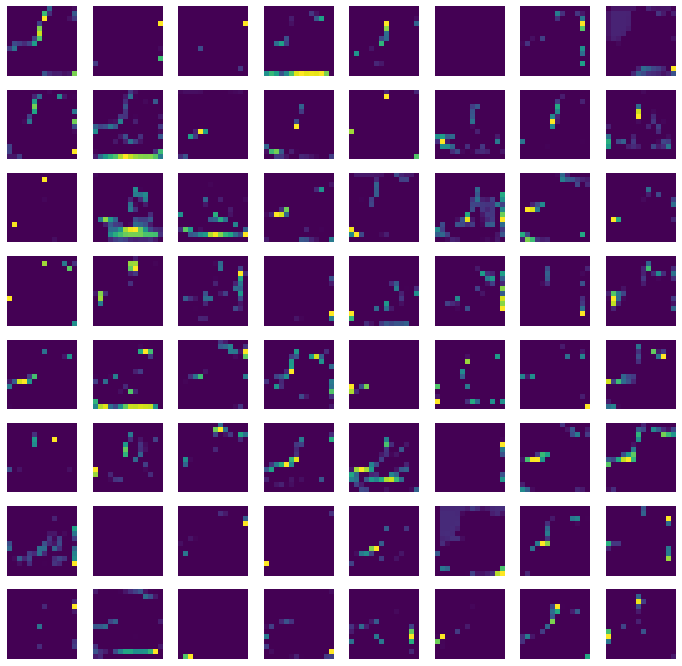

In [30]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()